#### Startup Transformation
In this project, you’ll work as a data analyst for a tech startup that is looking to improve its operations after a global pandemic has taken the world by storm.

You will apply data transformation techniques to make better sense of the company’s data and help answer important questions such as:

Is the company in good financial health?
Does the company need to let go of any employees?
Should the company allow employees to work from home permanently?

In [1]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# load in financial data
financial_data = pd.read_csv('/Users/elorm/Documents/Repos/Datasets/financial_data.csv')

# code goes here
print(financial_data.head(3))

   Month  Revenue  Expenses
0      1  1420000    510000
1      2  1200000    532000
2      3  1050000    551000


In [3]:
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Month     6 non-null      int64
 1   Revenue   6 non-null      int64
 2   Expenses  6 non-null      int64
dtypes: int64(3)
memory usage: 272.0 bytes


In [4]:
# Storing each column in three separate variables
month = financial_data['Month']
revenue = financial_data['Revenue']
expenses = financial_data['Expenses']

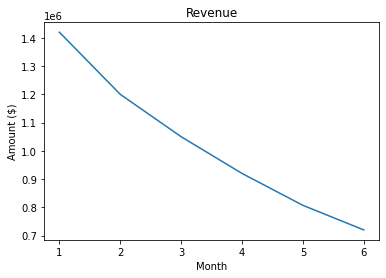

In [5]:
#plot of revenue over the past six months
plt.plot(month, revenue)
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Revenue')
plt.show()

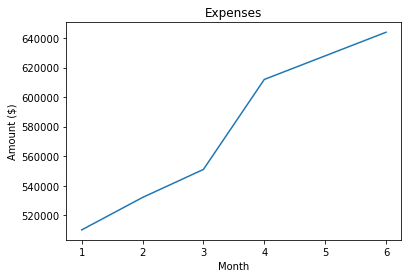

In [6]:
#plot of expenses over the past six months
plt.plot(month, expenses)
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Expenses')
plt.show()

In [7]:
expense_overview = pd.read_csv('/Users/elorm/Documents/Repos/Datasets/expenses.csv')
print(expense_overview)

       Expense  Proportion
0     Salaries        0.62
1  Advertising        0.15
2  Office Rent        0.15
3    Equipment        0.03
4    Utilities        0.03
5      Supples        0.01
6         Food        0.01


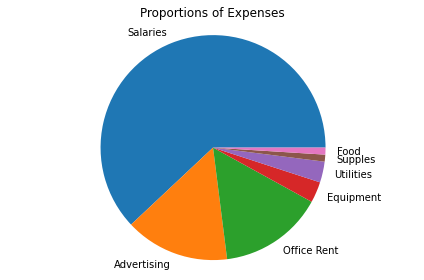

In [8]:
#Making a pie chart of expenses
expense_categories = expense_overview['Expense']
proportions = expense_overview['Proportion']
plt.clf()
plt.pie(proportions, labels = expense_categories, normalize = False)
plt.title('Proportions of Expenses')
plt.axis('Equal')
plt.tight_layout()
plt.show()


It seems that Salaries, Advertising, and Office Rent make up most of the expenses, while the rest of the categories make up a small percentage.
So we would like to update the pie chart so that all categories making up less than 5% of the overall expenses (Equipment, Utilities, Supplies, and Food) are collapsed into an “Other” category.

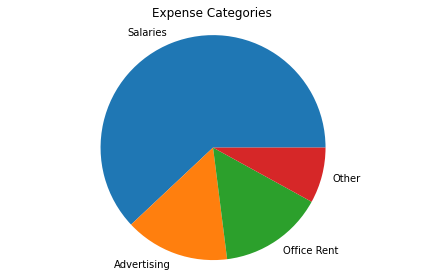

In [9]:
expense_categories = ['Salaries', 'Advertising', 'Office Rent', 'Other']
proportions = [0.62, 0.15, 0.15, 0.08]
plt.clf()
plt.pie(proportions, labels = expense_categories, normalize = False)
plt.title('Expense Categories')
plt.axis('Equal')
plt.tight_layout()
plt.show()

The code above works fine but I feel it won't be efficient if you are dealing with a dataset with a large number of rows. SoI tried doing the same thing but in a different way to take care of datasets with plenty rows

In [10]:
proportions = []
for i in range(len(expense_overview['Proportion'])):
    if expense_overview['Proportion'][i] < 0.05:
        proportions.append(expense_overview['Proportion'][i])
        
print('Value of proportions less than 5% {}'.format(proportions))

#Converting the proportions list to an array so we can sum all the elements
proportions = np.array(proportions)
proportions_sum = np.sum(proportions)

#Creating a new row that will be appended to the existing dataframe
new_row = {'Expense': 'Other', 'Proportion': round(proportions_sum, 3)}

#Appending the new row to the dataframe
expense_overview = expense_overview.append(new_row, ignore_index = True)

#Taking a look what we have done so far
print('New expense overview dataframe : \n', expense_overview)


#Dropping unwanted columns
mask = expense_overview['Proportion'] < 0.05
rows_to_drop = expense_overview[mask]
ind_rows_to_drop = rows_to_drop.index.tolist()
print('Indexes of rows to drop:', ind_rows_to_drop)


#Dropping the rows 
expense_overview = expense_overview.drop(ind_rows_to_drop)
      
print(expense_overview)

Value of proportions less than 5% [0.03, 0.03, 0.01, 0.01]
New expense overview dataframe : 
        Expense  Proportion
0     Salaries        0.62
1  Advertising        0.15
2  Office Rent        0.15
3    Equipment        0.03
4    Utilities        0.03
5      Supples        0.01
6         Food        0.01
7        Other        0.08
Indexes of rows to drop: [3, 4, 5, 6]
       Expense  Proportion
0     Salaries        0.62
1  Advertising        0.15
2  Office Rent        0.15
7        Other        0.08


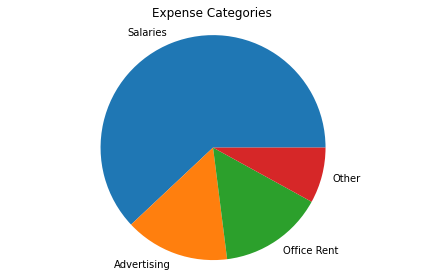

In [11]:
#Plotting the pie chart again
proportions = expense_overview['Proportion']
expense_categories = ['Salaries', 'Advertising', 'Office Rent', 'Other']
plt.pie(proportions, labels = expense_categories, normalize = False)
plt.title('Expense Categories')
plt.axis('Equal')
plt.tight_layout()
plt.show()


Salaries make up 62% of expenses. The management team determines that to cut costs in a meaningful way, they must let go of some employees.

Each employee at the company is assigned a productivity score based on their work. The management would like to keep the most highly productive employees and let go of the least productive employees.

In [12]:
employees = pd.read_csv('/Users/elorm/Documents/Repos/Datasets/employees.csv')
print(employees.head(3))

               Name  Salary  Productivity  Commute Time
0    Mason Pender     87902         29.91         16.79
1         Mia Rew     95672         49.91         44.48
2  Jalisa Kroenke    177864         78.00         19.40


In [13]:
#Sorting the dataframe by column Productivity
sorted_productivity = employees.sort_values(by = 'Productivity')
print(sorted_productivity)

                  Name  Salary  Productivity  Commute Time
259       Wilber Rye    111647          0.06         49.42
92    Fredric Gandee    154469          0.24         22.48
252  Johnson Fordham    168684          1.46         22.39
178    Lilia Lemoine    167579          1.67         27.36
162   Hilma Laughton     85506          1.79         36.41
..                 ...     ...           ...           ...
164      Miki Hartle     50856         99.54         31.39
88        Darell Nau     30530         99.63         44.25
23    Joaquina Neece     95562         99.66         48.65
202    Janae Officer    110139         99.69         15.45
6    Jacinta Dunford    130968         99.98         44.53

[300 rows x 4 columns]


You should now see the employees with the lowest productivity scores at the top of the data frame.

The company decides to let go of the 100 least productive employees.

In [14]:
#Employees to lose their jobs
employees_cut = sorted_productivity.iloc[0:100, :]
print(len(employees_cut))

100


The COO (Chief Operating Officer) is debating whether to allow employees to continue to work from home post-pandemic.

He first wants to take a look at roughly how long the average commute time is for employees at the company. He asks for your help to analyze this data.

In [15]:
commute_times = employees['Commute Time']
print(commute_times.describe())

count    300.000000
mean      33.441700
std       16.128369
min        3.220000
25%       21.667500
50%       31.060000
75%       42.190000
max      101.780000
Name: Commute Time, dtype: float64


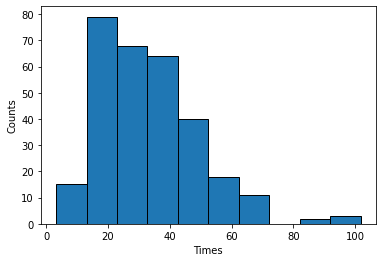

In [17]:
#Let’s explore the shape of the commute time data using a histogram
plt.hist(commute_times, edgecolor = 'black')
plt.xlabel('Times')
plt.ylabel('Counts')
plt.show()

In [18]:
print(commute_times.skew())

1.148400784154177


The commute time data appears to be right-skewed.

The data seems to be skewed to the right. To make it more symmetrical, we might try applying a log transformation.

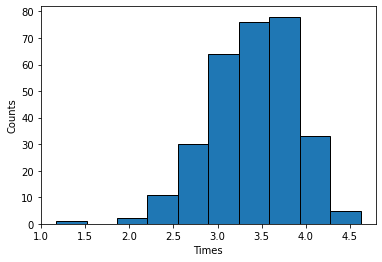

In [20]:
#Transforming commute times using log transformation
commute_times_log = np.log(commute_times)

#Plotting the histogram again
plt.hist(commute_times_log, edgecolor = 'black')
plt.xlabel('Times')
plt.ylabel('Counts')
plt.show()

In [21]:
print(commute_times_log.skew())

-0.4241330491752042


Generally, if skewness is less than `-1` or greater than `1`, the distribution is highly skewed.

After applying log transformation, the transformed data is more “normal” than before.